The FAO Food Price Index (FFPI) 
is a measure of the monthly change in international prices of a basket of food commodities. It consists of the average of five commodity group price indices weighted by the average export shares of each of the groups over 2014-2016.

In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Read TS Data

In [66]:
food = pd.read_csv('fao_food_prices.csv', header=2)
food.drop(axis=0, index=0, inplace=True)
food['Date'] = pd.to_datetime(food['Date'])
food.set_index("Date", inplace=True)
food.dropna(inplace=True)

# Subplots

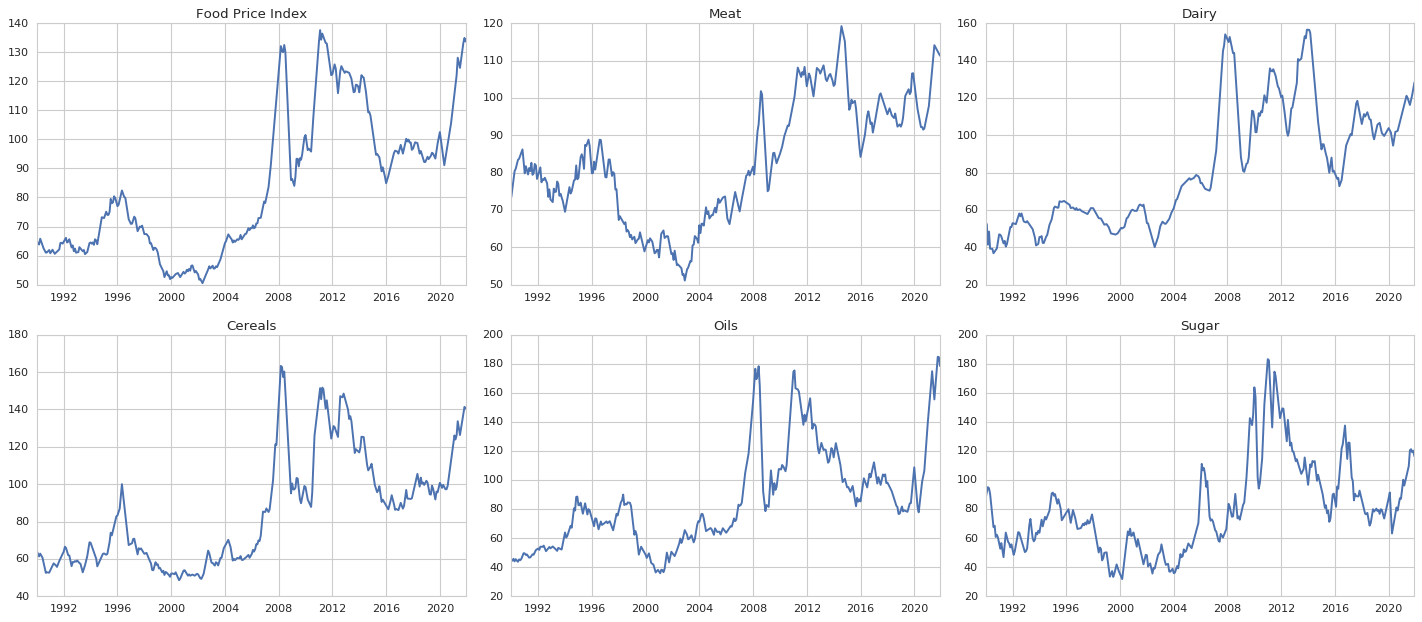

In [349]:
with plt.style.context("fast"):
    fig, axes = plt.subplots(2, 3, figsize=(18, 8))
    for i, ax in enumerate(axes.flatten()):
            index = food.columns[i]
            ax.plot(food[index])
            ax.set_title(index)
    
plt.tight_layout()

# Stylsheets

## Custom Stylesheet

In [89]:
print(plt.style.available) # see which styles are available

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


Built a custom style name.mplstyle and navigate with full path

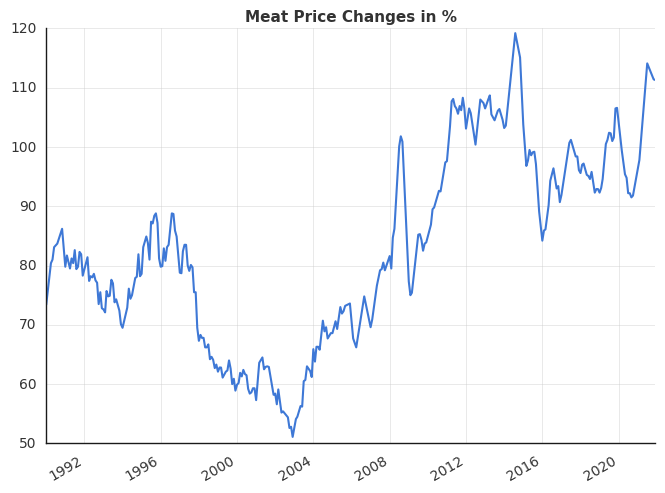

In [369]:
import matplotlib.dates as mdates
with plt.style.context('/home/mz/.config/matplotlib/stylelib/timeseries.mplstyle'): #style.context ensures style is confined to this figure
    fig, ax = plt.subplots();           # ax is needed for some functions
    ax.plot(food.Meat);
    plt.title("Meat Price Changes in %")
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    for label in ax.get_xticklabels(which='major'):
        label.set(rotation=30, ha='right')
    plt.show()

## Cyperpunk Stylesheet

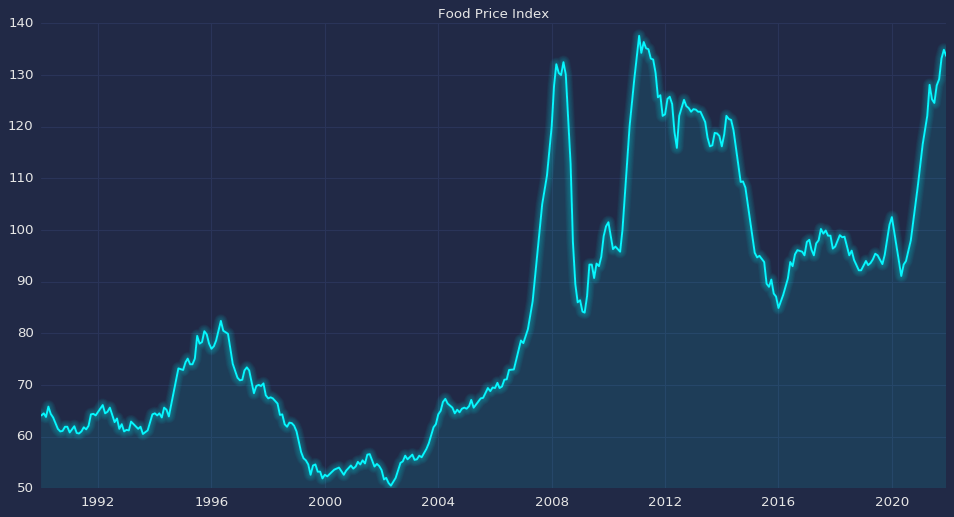

In [290]:
import matplotlib.dates as mdates
import mplcyberpunk
index = "Food Price Index"

with plt.style.context('cyberpunk'): #style.context ensures style is confined to this figure
    fig, ax = plt.subplots(figsize = (13,7));           # ax is needed for some functions
    ax.plot(food[index]);
    plt.title(index)
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    mplcyberpunk.make_lines_glow()
    mplcyberpunk.add_underglow()
    plt.show()

# Colors

## Custom colors 
find some nice color palettes here
http://colormind.io/

In [396]:
CB91_Blue = '#2CBDFE'
CB91_Green = '#47DBCD'
CB91_Pink = '#F3A0F2'
CB91_Purple = '#9D2EC5'
CB91_Violet = '#661D98'
CB91_Amber = '#F5B14C'

In [428]:
color_list = [CB91_Blue, CB91_Pink, CB91_Green, CB91_Amber,
              CB91_Purple, CB91_Violet]

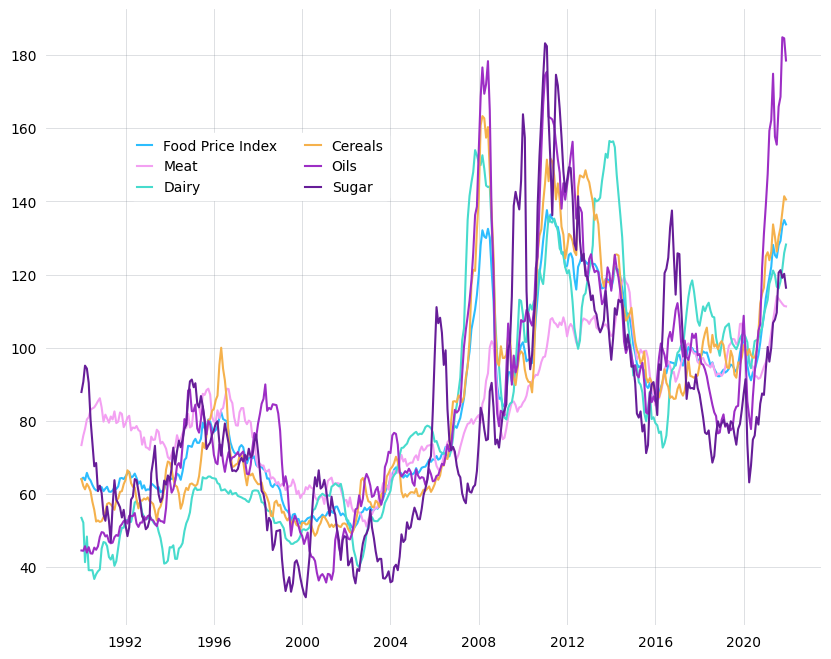

In [618]:
import matplotlib as mpl
import seaborn as sns
mpl.rcParams.update(mpl.rcParamsDefault)   # reset to default matplot style 
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=color_list)

fig, ax = plt.subplots(figsize=(10,8));
ax.spines[:].set_visible(False) # remove axis
# The light gray, horizontal gridlines
ax.yaxis.grid(True, color='#7F8992', ls='-', lw=0.6, alpha=0.3, zorder=0)
ax.xaxis.grid(True, color='#7F8992', ls='-', lw=0.6, alpha=0.3, zorder=0)
ax.tick_params(left=False, bottom=False)

for i in food.columns:
    ax.plot(food[i])
  

plt.legend(labels=food.columns,
           ncol=2,
           loc=(0.11,0.69), 
           frameon=True,       # no legend frame
           framealpha=1,
           facecolor="w", 
           edgecolor="w",
           fontsize="medium",
           labelspacing=0.5,
           handlelength=1.1) 
plt.show()


## Gradient
get gradients here: https://colordesigner.io/gradient-generator

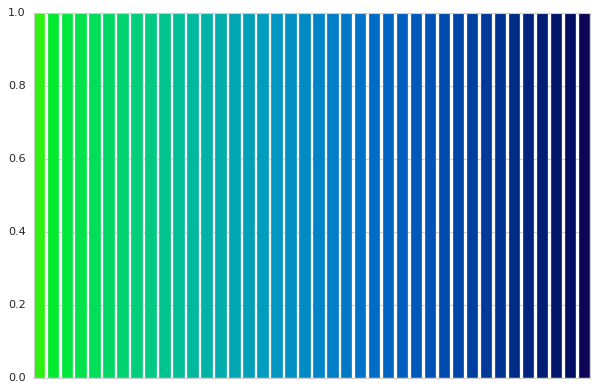

In [414]:
gradient = ["#30ef12", "#00eb2d", "#00e73e", "#00e24d", "#00dd59", "#00d865", "#00d370", "#00ce7a",
"#00c984", "#00c38d", "#00be96", "#00b89e", "#00b3a5", "#00adac", "#00a7b2", "#00a1b8",
"#009cbd","#0096c1","#0090c4","#008ac6","#0084c8","#007ec8","#0078c8","#0072c7","#006cc5",
"#0065c2","#005fbe","#0059ba","#0053b4","#004cae","#0046a8","#003fa0","#003998","#003290",
"#002b87","#00247d","#001d74","#00166a","#000d60","#0f0456"]
for i in gradient:
    plt.bar(i, height=1, color=i)
    plt.xticks([])

In [303]:
whodata = pd.read_csv('/home/mz/Scripts/data/WHO.csv')

In [305]:
whodata.set_index("Country", inplace=True)

In [324]:
whodata

,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),Population in urban areas (%),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,1,1,151.0,28.0,NaN,NaN,NaN,26088.0,4.0,23.0,...,692.50,NaN,NaN,NaN,257.00,231.9,257.00,5740436.0,5.44,22.9
Albania,2,2,27.0,98.7,6000.0,93.0,94.0,3172.0,0.6,46.0,...,3499.12,4.790000e+09,78.14,-2.040000e+09,18.47,15.5,18.47,1431793.9,2.21,45.4
Algeria,3,3,6.0,69.9,5940.0,94.0,96.0,33351.0,1.5,64.0,...,137535.56,6.970000e+10,351.36,4.700000e+09,40.00,31.2,40.00,20800000.0,2.61,63.3
Andorra,4,2,NaN,NaN,NaN,83.0,83.0,74.0,1.0,93.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Angola,5,3,146.0,67.4,3890.0,49.0,51.0,16557.0,2.8,54.0,...,8991.46,1.490000e+10,27.13,9.140000e+09,164.10,242.5,164.10,8578749.0,4.14,53.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,198,6,25.0,90.3,2310.0,91.0,96.0,86206.0,1.4,27.0,...,101826.23,4.480000e+10,47.11,-1.940000e+09,20.20,23.4,20.20,21900000.0,2.90,26.4
West Bank and Gaza,199,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,655.86,3.780000e+09,NaN,NaN,28.00,25.8,28.00,2596216.0,3.33,71.6
Yemen,200,1,83.0,54.1,2090.0,65.0,85.0,21732.0,3.0,28.0,...,20148.34,1.150000e+10,114.52,8.310000e+08,82.40,87.9,82.40,5759120.5,4.37,27.3


In [328]:
BGD = whodata[whodata.index.str.match("Bangladesh")]
CHE = whodata[whodata.index.str.match("Switzerland")]

,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),Population in urban areas (%),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
Country,,,,,,,,,,,,,,,,,,,,,
Switzerland,175,2,5.0,NaN,40840.0,89.0,89.0,7455.0,0.4,76.0,...,41165.04,2.590000e+11,NaN,2.570000e+10,5.3,4.7,5.3,5592699.0,1.2,75.2


In [331]:
Banglaswitz = pd.concat([BGD, CHE])
Banglaswitz

,CountryID,Continent,Adolescent fertility rate (%),Adult literacy rate (%),Gross national income per capita (PPP international $),Net primary school enrolment ratio female (%),Net primary school enrolment ratio male (%),Population (in thousands) total,Population annual growth rate (%),Population in urban areas (%),...,Total_CO2_emissions,Total_income,Total_reserves,Trade_balance_goods_and_services,Under_five_mortality_from_CME,Under_five_mortality_from_IHME,Under_five_mortality_rate,Urban_population,Urban_population_growth,Urban_population_pct_of_total
Country,,,,,,,,,,,,,,,,,,,,,
Bangladesh,14,7,135.0,47.5,1230.0,90.0,87.0,155991.0,1.8,25.0,...,39952.26,6.140000e+10,14.92,-4.160000e+09,72.0,76.0,72.0,38500000.0,3.34,25.1
Switzerland,175,2,5.0,NaN,40840.0,89.0,89.0,7455.0,0.4,76.0,...,41165.04,2.590000e+11,NaN,2.570000e+10,5.3,4.7,5.3,5592699.0,1.20,75.2


# Barh

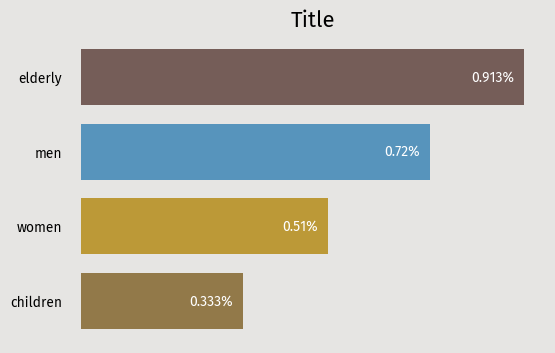

In [726]:
from matplotlib import rc
plt.matplotlib.rc_file_defaults() # reset defaults 

a={"children": 0.33345, "women": 0.50976, "men":   0.71979, "elderly": 0.91287554}
colors=["#927949", "#BC9937", "#5794BC", "#755D58", "#273E52"]

font = {'family' : 'Fira Sans', 'size'   : 10}
plt.rc('font', **font)  # change fonts

fig, ax = plt.subplots(figsize=(6, 4), facecolor="#E6E5E3") # figure color
plt.title('Title', fontsize=16)
#plt.ylabel('AgeGroup', fontdict="Fira Sans")
ax.set_facecolor('#E6E5E3')  # axis color
ax.spines[:].set_visible(False) # remove axis
ax.tick_params(labelbottom=False, bottom=False, left=False, pad=10) # manipulate ticks and labels

for n, i in enumerate(a):
    ax.barh(i, a[i], height=0.75, color=colors[n])
    ax.text(a[i]-0.02, #X location of text (with adjustment)
            n, #Y location
            s=f'{round(a[i],3)}%', #Required label with formatting
            va='center', #Vertical alignment
            ha='right', #Horizontal alignment
            color='white') #Font colour and size

# Pie Chart

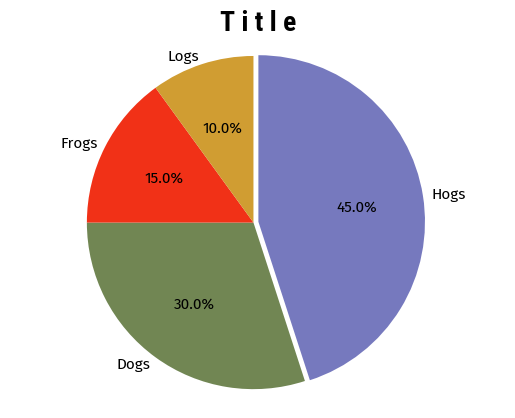

In [892]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels =  'Hogs', 'Dogs','Frogs', 'Logs'
sizes = [45, 30, 15, 10]
explode = (0.03, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
colors = ["#7679BE", "#718653", "#F13117", "#D09D32", "#D3D1B9"]

fig1, ax1 = plt.subplots()
ax1.set_title("T i t l e", fontname="Roboto Condensed", fontsize=20, fontweight="bold")
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', counterclock=False, 
        colors=colors, shadow=False, startangle=90, 
        textprops={'fontname': 'Fira Sans', 'fontsize': 11}, labeldistance=1.05)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()


# Fonts

## available fonts

In [2]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [764]:
# set default font family
plt.rcParams['font.family'] = 'sans-serif'

In [765]:
# see the current default font family
print(plt.rcParams['font.family'])

['sans-serif']


In [778]:
# set fonts in a family
plt.rcParams['font.sans-serif'] = ['Fira Sans', 'Nimbus Sans',
                               'Nunito Sans', 'Assistant']

In [779]:
# list of fonts in sans-serif
plt.rcParams['font.sans-serif']

['Fira Sans', 'Nimbus Sans', 'Nunito Sans', 'Assistant']

In [1]:
import matplotlib.font_manager as font_manager
font_manager.fontManager.ttflist

[<Font 'cmmi10' (cmmi10.ttf) normal normal 400 normal>,
 <Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>,
 <Font 'cmex10' (cmex10.ttf) normal normal 400 normal>,
 <Font 'STIXNonUnicode' (STIXNonUniIta.ttf) italic normal 400 normal>,
 <Font 'STIXSizeTwoSym' (STIXSizTwoSymBol.ttf) normal normal 700 normal>,
 <Font 'STIXSizeFiveSym' (STIXSizFiveSymReg.ttf) normal normal 400 normal>,
 <Font 'STIXNonUnicode' (STIXNonUniBol.ttf) normal normal 700 normal>,
 <Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.ttf) normal normal 400 normal>,
 <Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal 400 normal>,
 <Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal 700 normal>,
 <Font 'DejaVu Serif' (DejaVuSerif-Italic.ttf) italic normal 400 normal>,
 <Font 'STIXSizeFourSym' (STIXSizFourSymBol.ttf) normal normal 700 normal>,
 <Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>,
 <Font 'DejaVu Sans' (DejaVuSans-Oblique.ttf) oblique normal 400 normal>,
 <Font 'STIXGeneral' (STIXGen

In [645]:
# Add every font at the specified location
font_dir = ['/usr/share/fonts']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)

## change font family

Text(0, 0.5, 'Percentage Change')

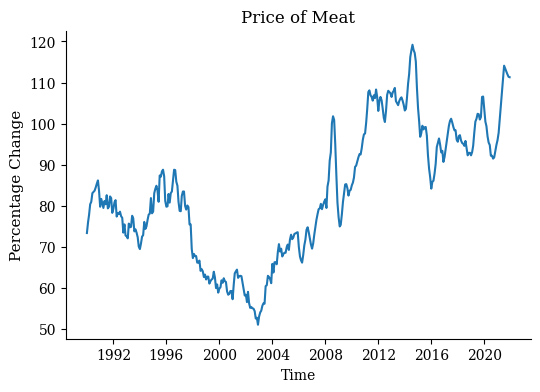

In [788]:
plt.rcdefaults()
plt.rcParams.update({'font.family':'serif'}) # change the default font family
fig, ax = plt.subplots(figsize=(6, 4)) # figure color
plt.plot(food.Meat)
ax.spines[["top", "right"]].set_visible(False) # remove axis
plt.title('Price of Meat')
plt.xlabel('Time', fontsize= 10)
plt.ylabel("Percentage Change", fontsize=11)

## set destinct fonts 

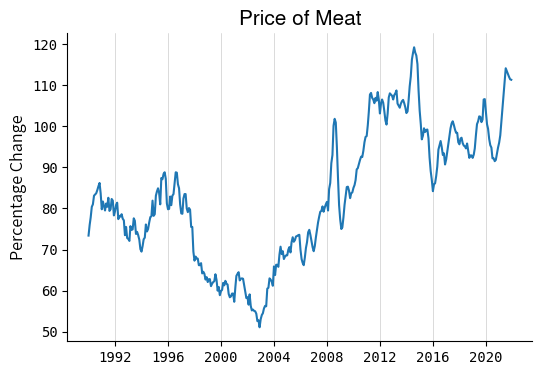

In [821]:
plt.rcdefaults()    # reset the plot configurations to default
plt.rcParams.update({'font.family':'monospace'}) # set overall font.family
fig, ax = plt.subplots(figsize=(6, 4)) # figure color
ax.spines[["top", "right"]].set_visible(False) # remove axis
ax.grid(axis="x", which="major", alpha=0.8, lw=0.4, ls="-")
plt.plot(food.Meat)
plt.title('Price of Meat', fontname="Nimbus Sans", fontsize=15) # set special font
plt.ylabel('Percentage Change', fontname="Assistant", fontsize=13)
plt.show()

## all rcParams keys

In [735]:
plt.rcParams.keys()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
        